In [52]:
import pandas as pd
import numpy as np
from common import collect_results, normalize_region_name
from pathlib import Path
from matplotlib import pyplot as plt

In [53]:
ROOT = Path("./mixed")

def get_matcher(prefix):
    def matcher(p: Path):   
        import re
        pattern = re.compile(prefix + r"-hot(\d+)-(\w)-mr(\d+)-([\d-]+)")
        match = pattern.match(p.name)
        if not match:
            return None

        print("Found result:", p.name)
        hot = int(match.group(1))
        return {
            "hot": 1000000 if hot == 0 else hot,
            "workload": str(match.group(2)),
            "mr": int(match.group(3)),
            "suffix": str(match.group(4)),
        }
    
    return matcher

# Throughput


In [54]:
SYSTEMS = ["sunstorm", "aurora-global", "aurora-eventual", "yugabyte"]
# SYSTEMS = ["sunstorm", "yugabyte"]
HOTS = [100000, 1000]
RENEW_CACHE = False

sunstorm_matcher = get_matcher("ycsb-mixed-sunstorm")
sunstorm_throughput_df = collect_results(
    ROOT / "sunstorm",
    sunstorm_matcher,
    RENEW_CACHE,
)
sunstorm_throughput_df["system"] = "sunstorm"


aurora_matcher = get_matcher("ycsb-mixed-aurora")
aurora_throughput_df = collect_results(
    ROOT / "aurora",
    aurora_matcher,
    RENEW_CACHE,
)
aurora_throughput_df["system"] = "aurora-global"


aurora_matcher = get_matcher("ycsb-mixed-aurora")
aurora_eventual_throughput_df = collect_results(
    ROOT / "aurora-eventual",
    aurora_matcher,
    RENEW_CACHE,
)
aurora_eventual_throughput_df["system"] = "aurora-eventual"


yugabyte_matcher = get_matcher("ycsb-mixed-yugabyte")
yugabyte_throughput_df = collect_results(
    ROOT / "yugabyte",
    yugabyte_matcher,
    RENEW_CACHE,
)
yugabyte_throughput_df["system"] = "yugabyte"

Found result: ycsb-mixed-aurora-hot1000-F-mr10-20240610-122214
Found result: ycsb-mixed-aurora-hot100000-F-mr10-20240610-122214
Found result: ycsb-mixed-aurora-hot1000-F-mr0-20240610-122214
Found result: ycsb-mixed-aurora-hot100000-F-mr50-20240610-122214
Found result: ycsb-mixed-aurora-hot100000-F-mr0-20240610-122214
Found result: ycsb-mixed-aurora-hot1000-F-mr50-20240610-122214
Found result: ycsb-mixed-aurora-hot100000-F-mr5-20240610-122214
Found result: ycsb-mixed-aurora-hot1000-F-mr5-20240610-122214
Found result: ycsb-mixed-aurora-hot100000-F-mr15-20240610-122214
Found result: ycsb-mixed-aurora-hot1000-F-mr15-20240610-122214


In [74]:
throughput_df = pd.concat([
    sunstorm_throughput_df,
    aurora_throughput_df,
    aurora_eventual_throughput_df,
    yugabyte_throughput_df,
])
normalize_region_name(throughput_df)
throughput_df["workload"] = '95% Reads, 5% Writes'
throughput_df

,path,region,hot,workload,mr,suffix,rejected,rejected.WorkloadB1,rejected.WorkloadB2,rejected.WorkloadB3,...,throughput.WorkloadB3,scalefactor,terminals,time,rate,warmup,system,unexpected.WorkloadB1,unexpected.WorkloadB2,unexpected.WorkloadB3
0,mixed/sunstorm/ycsb-mixed-sunstorm-hot100000-F...,1-us-east-1-0,100000,"95% Reads, 5% Writes",50,20240604-111535,38,2.0,28.0,8.0,...,137.8,1000,128,90,50000,30,sunstorm,NaN,NaN,NaN
1,mixed/sunstorm/ycsb-mixed-sunstorm-hot100000-F...,3-ap-northeast-1-0,100000,"95% Reads, 5% Writes",50,20240604-111535,33,3.0,25.0,5.0,...,94.1,1000,128,90,50000,30,sunstorm,NaN,NaN,NaN
2,mixed/sunstorm/ycsb-mixed-sunstorm-hot100000-F...,2-eu-west-1-0,100000,"95% Reads, 5% Writes",50,20240604-111535,27,2.0,22.0,3.0,...,115.3,1000,128,90,50000,30,sunstorm,NaN,NaN,NaN
3,mixed/sunstorm/ycsb-mixed-sunstorm-hot100000-F...,1-us-east-1-0,100000,"95% Reads, 5% Writes",5,20240604-111535,86,18.0,53.0,15.0,...,76.0,1000,96,90,50000,30,sunstorm,NaN,NaN,NaN
4,mixed/sunstorm/ycsb-mixed-sunstorm-hot100000-F...,3-ap-northeast-1-0,100000,"95% Reads, 5% Writes",5,20240604-111535,122,11.0,94.0,17.0,...,58.3,1000,96,90,50000,30,sunstorm,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
25,mixed/yugabyte/ycsb-mixed-yugabyte-hot1000-F-m...,3-ap-northeast-1-0,1000,"95% Reads, 5% Writes",15,20240604-171936,4906,1543.0,2774.0,589.0,...,54.5,1000,512,90,50000,30,yugabyte,NaN,NaN,NaN
26,mixed/yugabyte/ycsb-mixed-yugabyte-hot1000-F-m...,2-eu-west-1-0,1000,"95% Reads, 5% Writes",15,20240604-171936,5846,2235.0,2962.0,649.0,...,56.7,1000,512,90,50000,30,yugabyte,NaN,NaN,NaN
27,mixed/yugabyte/ycsb-mixed-yugabyte-hot1000-F-m...,1-us-east-1-0,1000,"95% Reads, 5% Writes",0,20240604-171936,6279,6279.0,NaN,NaN,...,NaN,1000,512,90,50000,30,yugabyte,NaN,NaN,NaN
28,mixed/yugabyte/ycsb-mixed-yugabyte-hot1000-F-m...,3-ap-northeast-1-0,1000,"95% Reads, 5% Writes",0,20240604-171936,6760,6760.0,NaN,NaN,...,NaN,1000,512,90,50000,30,yugabyte,NaN,NaN,NaN


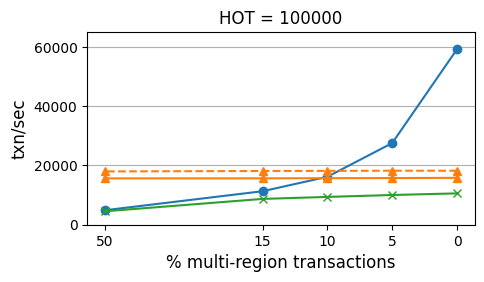

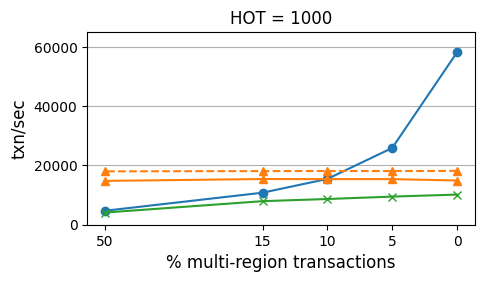

In [64]:
plt.rc('axes', labelsize=12) 
plt.rc('legend', fontsize=11)

for hot in HOTS:
    hot_df = throughput_df[throughput_df.hot == hot]
    hot_label = hot
    ax = hot_df.pivot_table(
        index=["mr"], columns=["system"], values="throughput", aggfunc="sum"
    )[SYSTEMS].plot(
        title=f"HOT = {hot_label}",
        xlabel="% multi-region transactions",
        ylabel="txn/sec",
        figsize=(5, 2.5),
        style=["o-", "^-", "^--", "x-"],
        color=["C0", "C1", "C1", "C2"],
        ylim=(0, 65000),
        rot=0,
        legend=False
    )
    ax.set_xscale("symlog", linthresh=20)
    ax.set_xticks([0, 5, 10, 15, 50])
    ax.set_xticklabels([0, 5, 10, 15, 50])
    ax.margins(x=0.05)
    ax.grid(axis="y")
    #ax.legend(title="", ncol=4, handletextpad=0.3)
    ax.invert_xaxis()
    #plt.savefig(f"output/micro-throughput-hot{hot}.pdf", bbox_inches="tight")


# Errors


## Single-home

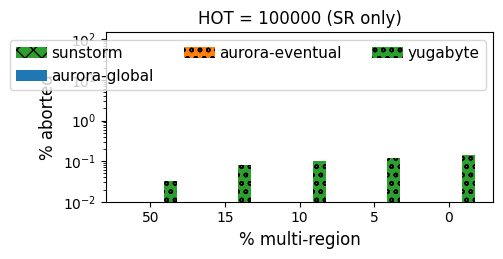

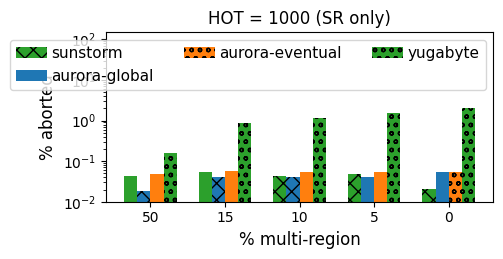

In [65]:
plt.rc('axes', labelsize=12) 
plt.rc('legend', fontsize=11)

for hot in HOTS:
    hot_df = throughput_df[throughput_df.hot == hot]
    aborted_df = hot_df.pivot_table(
        index=["mr"], columns=["system"], values="rejected.WorkloadB1", aggfunc="sum"
    )
    completed_df = hot_df.pivot_table(
        index=["mr"], columns=["system"], values="completed", aggfunc="sum"
    )
    ratio_df = aborted_df / (aborted_df + completed_df) * 100

    hot_label = hot
    ax = ratio_df[reversed(SYSTEMS)].plot.bar(
        title=f"HOT = {hot_label} (SR only)",
        xlabel="% multi-region",
        ylabel="% aborted",
        figsize=(5, 2.2),
        rot=0,
        width=0.7,
        color=["C2", "C1", "C0"],
    )
    bars = ax.patches
    patterns = ["oo", "", "xx"]
    hatches = [p for p in patterns for _ in range(len(bars) // len(patterns))]
    for bar, hatch in zip(bars, hatches):
        bar.set_hatch(hatch)

    legend_handles, legend_labels = ax.get_legend_handles_labels()
    ax.legend(reversed(legend_handles), reversed(legend_labels), title="", ncol=3, handletextpad=0.3)
    ax.invert_xaxis()
    
    ax.margins(y=0.4)
    # plt.savefig(f"output/micro-abort-sr-hot{hot}.pdf", bbox_inches="tight")

    ax.set_yscale("log")
    ax.set_ylim(0.01, 150)
    # plt.savefig(f"output/micro-abort-sr-hot{hot}-logy.pdf", bbox_inches="tight")

## Multi-home

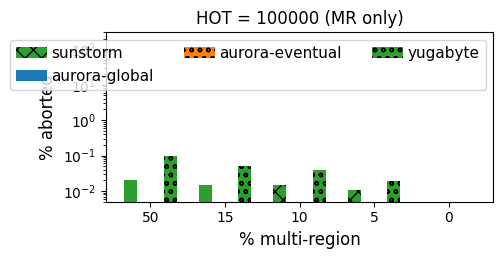

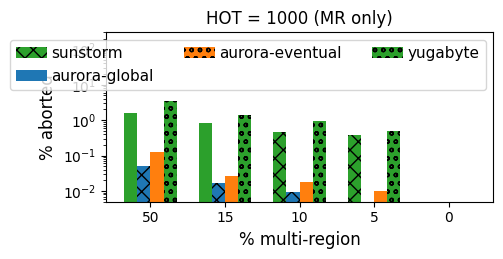

In [66]:
plt.rc('axes', labelsize=12) 
plt.rc('legend', fontsize=11)

for hot in HOTS:
    hot_df = throughput_df[throughput_df.hot == hot]
    rejected_2_df = hot_df.pivot_table(
        index=["mr"], columns=["system"], values="rejected.WorkloadB2", aggfunc="sum"
    )
    rejected_3_df = hot_df.pivot_table(
        index=["mr"], columns=["system"], values="rejected.WorkloadB3", aggfunc="sum"
    )
    completed_df = hot_df.pivot_table(
        index=["mr"], columns=["system"], values="completed", aggfunc="sum"
    )
    aborted_df = rejected_2_df + rejected_3_df
    ratio_df = aborted_df / (aborted_df + completed_df) * 100

    hot_label = hot
    ax = ratio_df[reversed(SYSTEMS)].plot.bar(
        title=f"HOT = {hot_label} (MR only)",
        xlabel="% multi-region",
        ylabel="% aborted",
        figsize=(5, 2.2),
        rot=0,
        width=0.7,
        color=["C2", "C1", "C0"],
    )
    bars = ax.patches
    patterns = ["oo", "", "xx"]
    hatches = [p for p in patterns for _ in range(len(bars) // len(patterns))]
    for bar, hatch in zip(bars, hatches):
        bar.set_hatch(hatch, )

    legend_handles, legend_labels = ax.get_legend_handles_labels()
    ax.legend(reversed(legend_handles), reversed(legend_labels), title="", ncol=3, handletextpad=0.3)
    ax.invert_xaxis()

    ax.margins(y=0.3)
    # plt.savefig(f"output/micro-abort-mr-hot{hot}.pdf", bbox_inches="tight")

    ax.set_yscale("log")
    ax.set_ylim(0.005, 300)
    # plt.savefig(f"output/micro-abort-mr-hot{hot}-logy.pdf", bbox_inches="tight")


## SunStorm error types

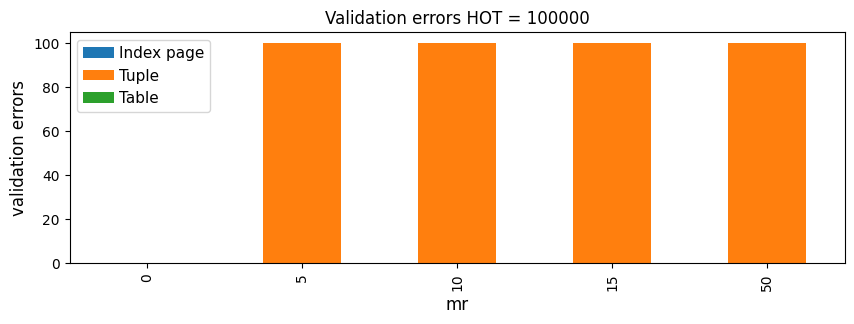

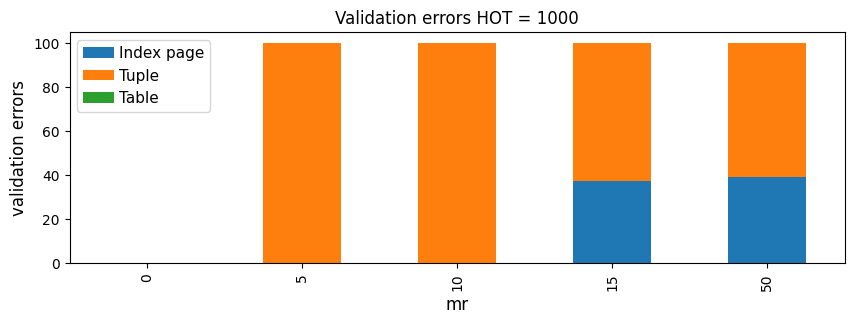

In [67]:
plt.rc('axes', labelsize=12) 
plt.rc('legend', fontsize=11)

sunstorm_df = throughput_df[throughput_df.system == "sunstorm"]
for hot in HOTS:
    hot_df = sunstorm_df[sunstorm_df.hot == hot]\
        .groupby(["mr"])\
        .sum()
    mh_aborts = hot_df["ood_tuple"] + hot_df["ood_index_page"]  + hot_df["ood_table"]
    hot_df["ood_index_page_pct"] = hot_df["ood_index_page"] / mh_aborts * 100
    hot_df["ood_tuple_pct"] = hot_df["ood_tuple"] / mh_aborts * 100
    hot_df["ood_table_pct"] = hot_df["ood_table"] / mh_aborts * 100
    ax = hot_df[["ood_index_page_pct", "ood_tuple_pct", "ood_table_pct"]].plot.bar( 
        title="Validation errors HOT = " + str(hot),
        ylabel="validation errors",
        figsize=(10, 3),
        stacked=True,
    )
    ax.legend(["Index page", "Tuple", "Table"], title="", ncol=1, handletextpad=0.3)
    


In [68]:
error_columns = ['ood_index_page', 'ood_tuple', 'other_aborts'] 
error_df = throughput_df.groupby(["hot", "system", "mr"]).sum()[error_columns + ['ood_table', 'deadlock', 'completed']]
error_df["ood_index_page_pct"] = error_df["ood_index_page"] / error_df["completed"] * 100
error_df["ood_table_pct"] = error_df["ood_table"] / error_df["completed"] * 100
error_df["ood_tuple_pct"] = error_df["ood_tuple"] / error_df["completed"] * 100
error_df["other_aborts_pct"] = error_df["other_aborts"] / error_df["completed"] * 100
error_df["deadlock_pct"] = error_df["deadlock"] / error_df["completed"] * 100
error_df["pct"] = error_df["deadlock_pct"] + error_df["ood_index_page_pct"] + error_df["ood_table_pct"] + error_df["ood_tuple_pct"] + error_df["other_aborts_pct"]
error_df.loc[(100000, "sunstorm",)]

,ood_index_page,ood_tuple,other_aborts,ood_table,deadlock,completed,ood_index_page_pct,ood_table_pct,ood_tuple_pct,other_aborts_pct,deadlock_pct,pct
mr,,,,,,,,,,,,
0,0,0,80,0,0,5333953,0.0,0.0,0.000000,0.001500,0.0,0.001500
5,0,269,47,0,0,2481204,0.0,0.0,0.010842,0.001894,0.0,0.012736
10,0,211,21,0,0,1456251,0.0,0.0,0.014489,0.001442,0.0,0.015931
15,0,153,18,0,0,1017656,0.0,0.0,0.015035,0.001769,0.0,0.016803
50,0,85,13,0,0,439498,0.0,0.0,0.019340,0.002958,0.0,0.022298


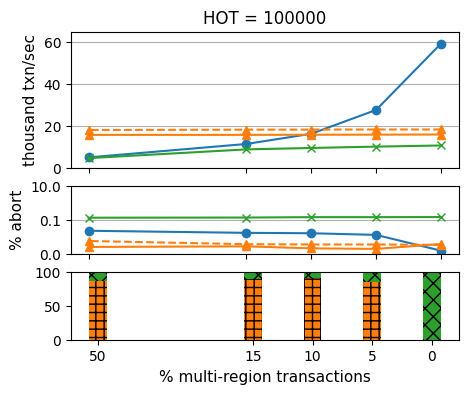

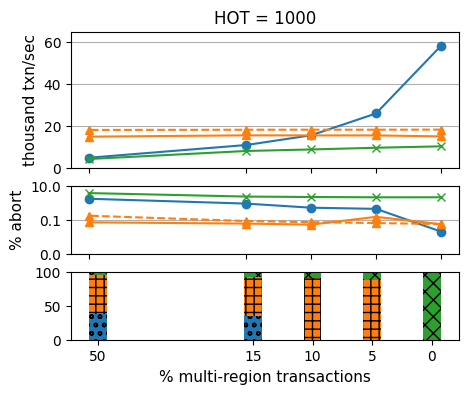

In [71]:
from matplotlib.ticker import ScalarFormatter

plt.rc('axes', labelsize=11) 
plt.rc('legend', fontsize=11)

xticks = [0, 5, 10, 15, 50]
xticklabels = [0, 5, 10, 15, 50]
legend_handles_labels = ([], [])
abort_colors = ["C0", "C1", "C2"]
abort_patterns = ["oo", "++", "xx"]

for hot in [100000, 1000]:
    fig, axes = plt.subplots(
        3, 1, 
        figsize=(5, 4),
        sharex=False,
        gridspec_kw={"height_ratios": [4, 2, 2]},
    )
    hot_throughput_df = throughput_df[throughput_df.hot == hot]
    pivoted = hot_throughput_df.pivot_table(
        index=["mr"], columns=["system"], values="throughput", aggfunc="sum"
    ).set_index(np.array(xticks)) / 1000
    pivoted[SYSTEMS].plot(
        ax=axes[0],
        title=f"HOT = {hot}",
        ylabel="thousand txn/sec",
        style=["o-", "^-", "^--", "x-"],
        color=["C0", "C1", "C1", "C2"],
        ylim=(0, 65),
        rot=0,
        legend=False,
    )
    axes[0].set_xscale("symlog", linthresh=20)
    axes[0].set_xticks(xticks)
    axes[0].set_xticklabels([])
    axes[0].margins(x=0.05)
    axes[0].grid(axis="y")
    # axes[0].legend(title="", ncol=3, handletextpad=0.3)
    axes[0].invert_xaxis()
    legend_handles_labels = axes[0].get_legend_handles_labels()

    error_df.unstack(level=1)["pct"].loc[hot][SYSTEMS]\
        .set_index(np.array(xticks))\
        .plot(
            ax=axes[1],
            ylabel="% abort",
            style=["o-", "^-", "^--", "x-"],
            color=["C0", "C1", "C1", "C2"],
            ylim=(0.001, 10),
            logy=True,
            rot=0,
            legend=False,
        )

    axes[1].set_xscale("symlog", linthresh=20)
    axes[1].set_xticks(xticks)
    axes[1].set_xticklabels([])
    axes[1].margins(x=0.05)
    axes[1].grid(axis="y")
    axes[1].invert_xaxis()
    axes[1].get_yaxis().set_major_formatter(ScalarFormatter())

    xticks_hack = [0, 5, 10, 15, 28]
    sunstorm_error_df = error_df.loc[(hot, "sunstorm",)].copy()
    error_columns_pct = [f"{col}_pct" for col in error_columns]
    bottom = None
    for col, color, pattern in zip(error_columns_pct, abort_colors, abort_patterns):
        error = sunstorm_error_df[col] / sunstorm_error_df["pct"] * 100
        axes[2].bar(
            xticks_hack,
            error,
            bottom=bottom,
            label=col,
            width=1.5,
            facecolor=color,
            hatch=pattern,
        )
        if bottom is None:
            bottom = error
        else:
            bottom += error
    axes[2].set_ylim(0, 100)
    axes[2].margins(x=0.05)
    axes[2].set_xticks(xticks_hack)
    axes[2].set_xticklabels(xticklabels)
    axes[2].set_xlabel("% multi-region transactions")
    axes[2].invert_xaxis()

    #plt.savefig(f"output/micro-throughput-hot{hot}.pdf", bbox_inches="tight")
    

# Latency


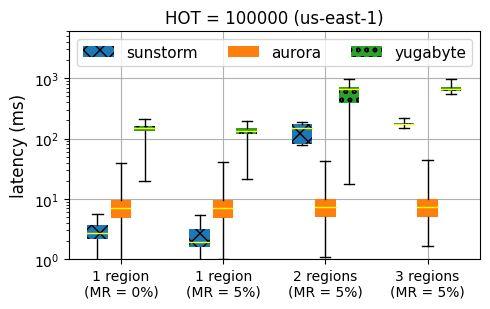

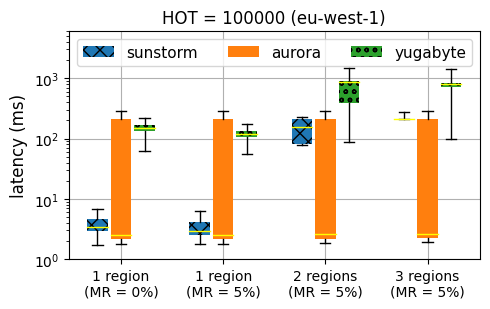

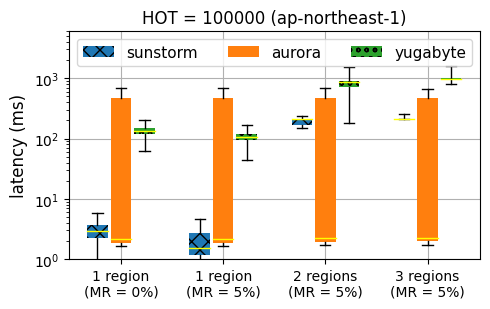

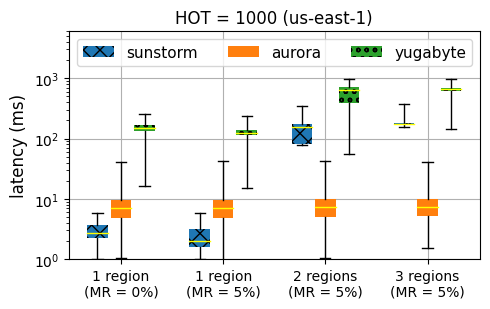

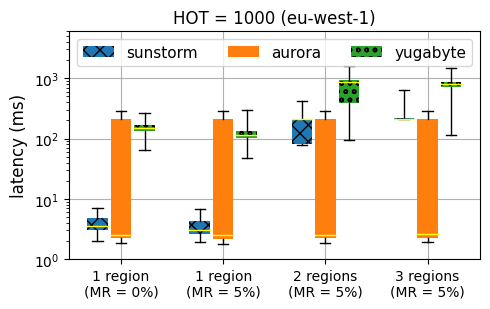

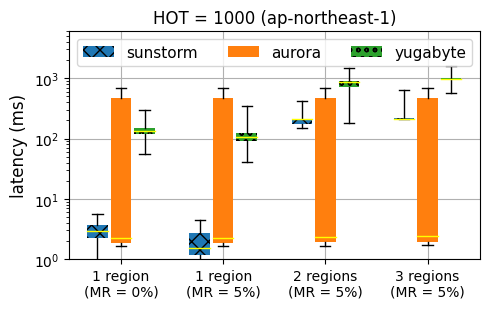

In [9]:
plt.rc('axes', labelsize=12) 
plt.rc('legend', fontsize=11)

labels = [
    "1 region\n(MR = 0%)",
    "1 region\n(MR = 5%)",
    "2 regions\n(MR = 5%)",
    "3 regions\n(MR = 5%)",
]
ticks = np.arange(len(labels))

width = 0.46

def to_box(df, n):
    return {
        'whislo': df[f"p0.WorkloadB{n}"].iloc[0],
        'q1': df[f"p25.WorkloadB{n}"].iloc[0],
        'med': df[f"p50.WorkloadB{n}"].iloc[0],
        'q3': df[f"p75.WorkloadB{n}"].iloc[0],
        'whishi': df[f"p99.WorkloadB{n}"].iloc[0],
        'fliers': []
    }

legends = []
patterns = ["xx", "", "oo"]

for hot in [100000, 1000]:
    hot_df = throughput_df[throughput_df.hot == hot]
    hot_label = hot
    for region in ["1-us-east-1", "2-eu-west-1", "3-ap-northeast-1"]:
        region_df = hot_df[hot_df.region.str.startswith(region)]

        fig, ax = plt.subplots(figsize=(5, 3.2))
        for i, system in enumerate(SYSTEMS):
            system_df = region_df[region_df.system == system]
            boxes = [
                to_box(system_df[system_df.mr == 0], 1),
                to_box(system_df[system_df.mr == 5], 1),
                to_box(system_df[system_df.mr == 5], 2),
                to_box(system_df[system_df.mr == 5], 3),
            ]
            comps = ax.bxp(
                boxes,
                positions=ticks - width / 2 + i * width / (len(SYSTEMS) - 1),
                showfliers=False,
                manage_ticks=False,
                patch_artist=True,
                widths=0.2,
                boxprops={
                    "facecolor": f"C{i}",
                    "linewidth": 0,
                    "hatch": patterns[i],
                },
                medianprops={
                    "color": "yellow",
                    "linewidth": 1,
                },
            )
            legends.append(comps["boxes"][0])

        ax.legend(legends, SYSTEMS, ncol=3)

        ax.set_xticks(labels=labels, ticks=ticks)
        ax.set_yscale("log")
        ax.set_ylim(1, 6000)
        ax.set_ylabel("latency (ms)")
        ax.grid()

        ax.set_title(f"HOT = {hot_label} ({region[2:]})")
        fig.tight_layout()
        # fig.savefig(f"output/micro-latency-{region[2:]}-hot{hot}.pdf", bbox_inches="tight")


In [10]:
def plot_latency(mr, hot):
    # Remove the "-0" suffix in region name
    throughput_df['region'] = throughput_df['region'].str.replace(r'-0', '', regex=True)
    regions = sorted([r for r in set(throughput_df.region.unique()) if not r.endswith("-0")])
    for system in throughput_df.system.unique():
        fig, axes = plt.subplots(1, len(regions), figsize=(20, 4), sharey=True)
        fig.suptitle(f"{system}, hot = {hot}, mr = {mr}%")
        workload_df = throughput_df[
            (throughput_df.system == system)
            & (throughput_df.mr == mr)
            & (throughput_df.hot == hot)
        ]
        # Plot for each region
        for i, region in enumerate(regions):
            region_df = workload_df[workload_df.region.str.startswith(region)]
            if region_df.empty:
                continue
            # Seperate the tran sactions by the number of regions they access
            max_nregion = 3
            index = range(1, max_nregion + 1)
            nregion_latency_df = {
                "p0": [region_df[f"p0.WorkloadB{n}"].iloc[0] for n in index],
                "p25": [region_df[f"p25.WorkloadB{n}"].iloc[0] for n in index],
                "p50": [region_df[f"p50.WorkloadB{n}"].iloc[0] for n in index],
                "p75": [region_df[f"p75.WorkloadB{n}"].iloc[0] for n in index],
                "p95": [region_df[f"p95.WorkloadB{n}"].iloc[0] for n in index],
                "p99": [region_df[f"p99.WorkloadB{n}"].iloc[0] for n in index],
            }
            pd.DataFrame(nregion_latency_df, index=index).plot.bar(
                title=region,
                ylabel="latency (ms)",
                ax=axes[i],
                rot=0,
                ylim=(1, 1200),
                logy=True,
            )
            axes[i].set_xlabel("number of regions")
            axes[i].grid(axis="y")
        plt.tight_layout()

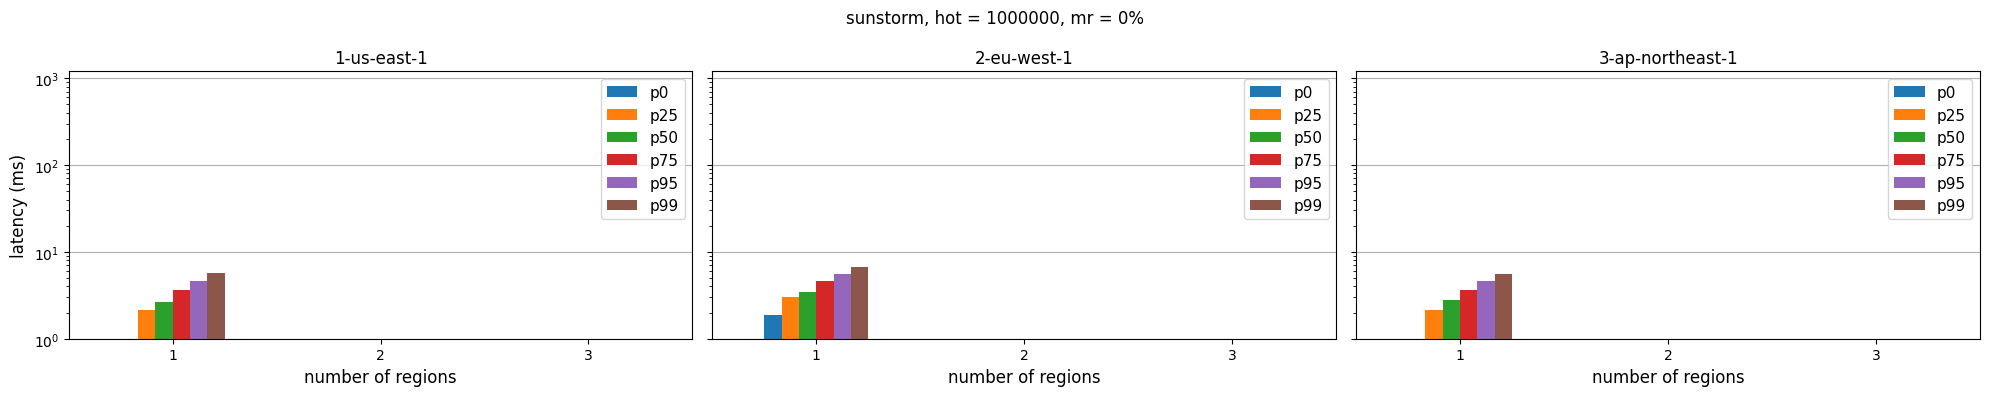

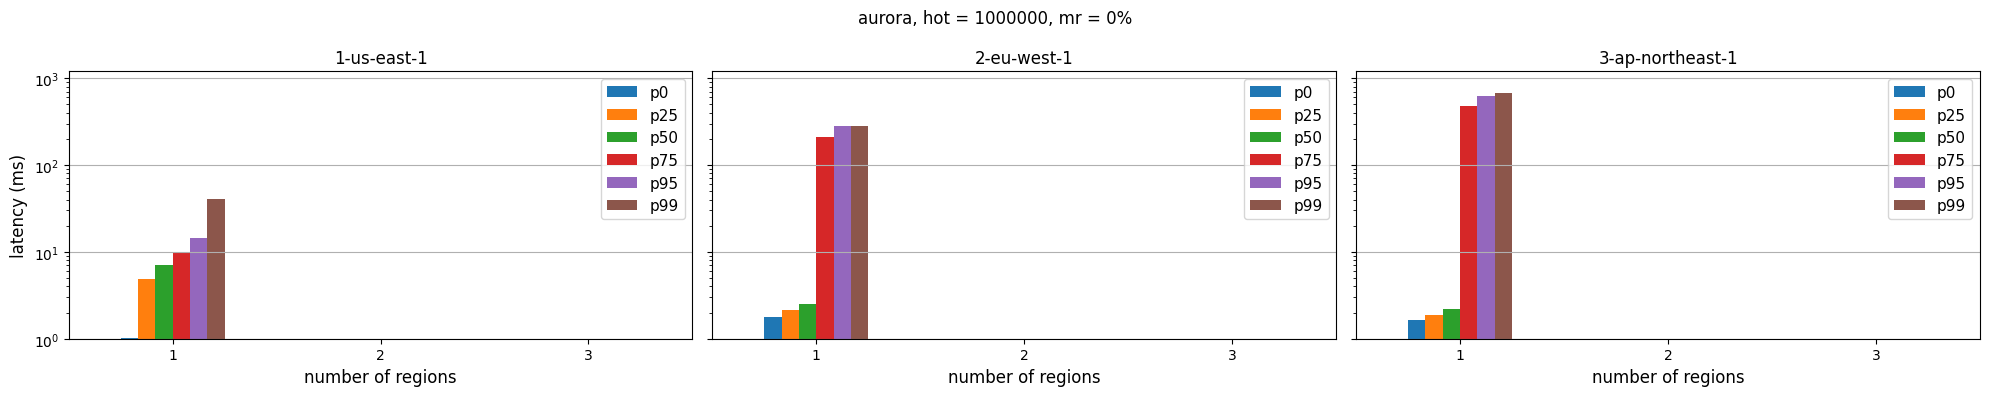

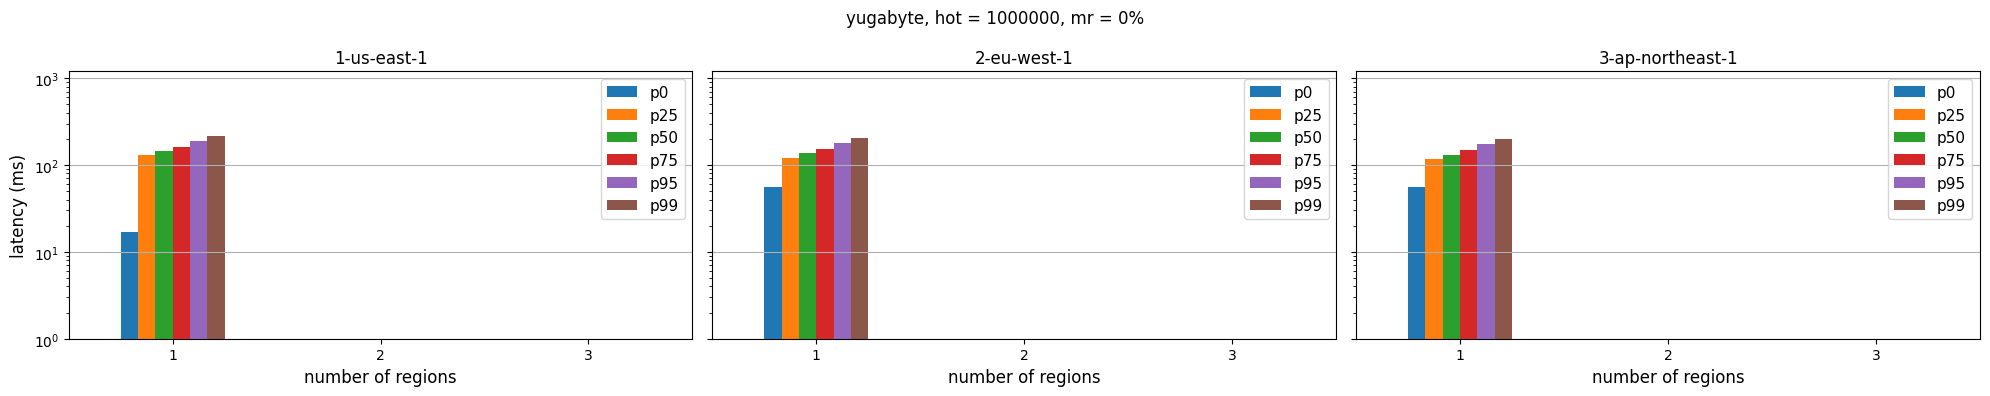

In [25]:
plot_latency(0, 1000000)

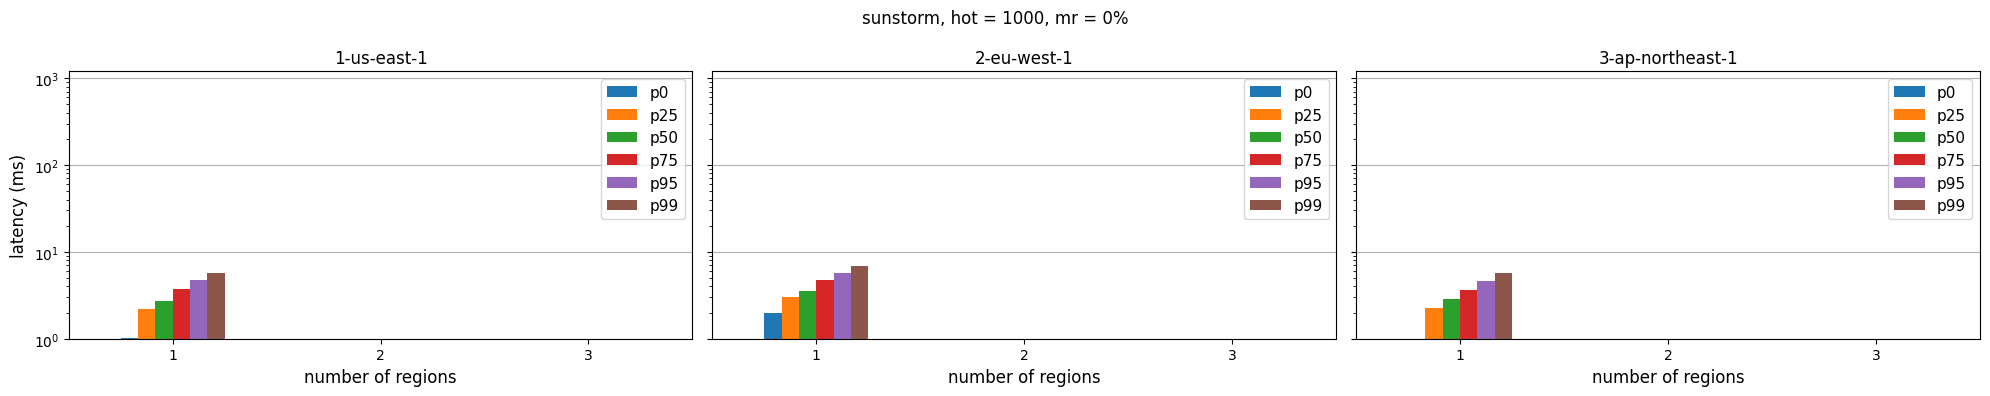

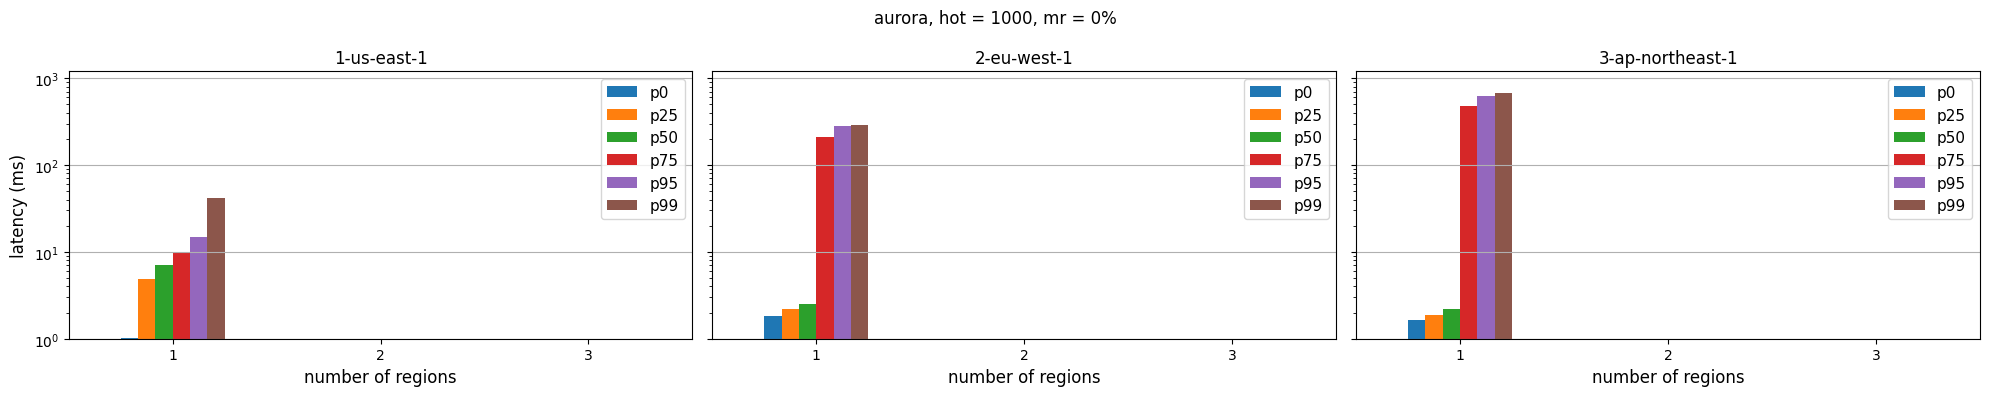

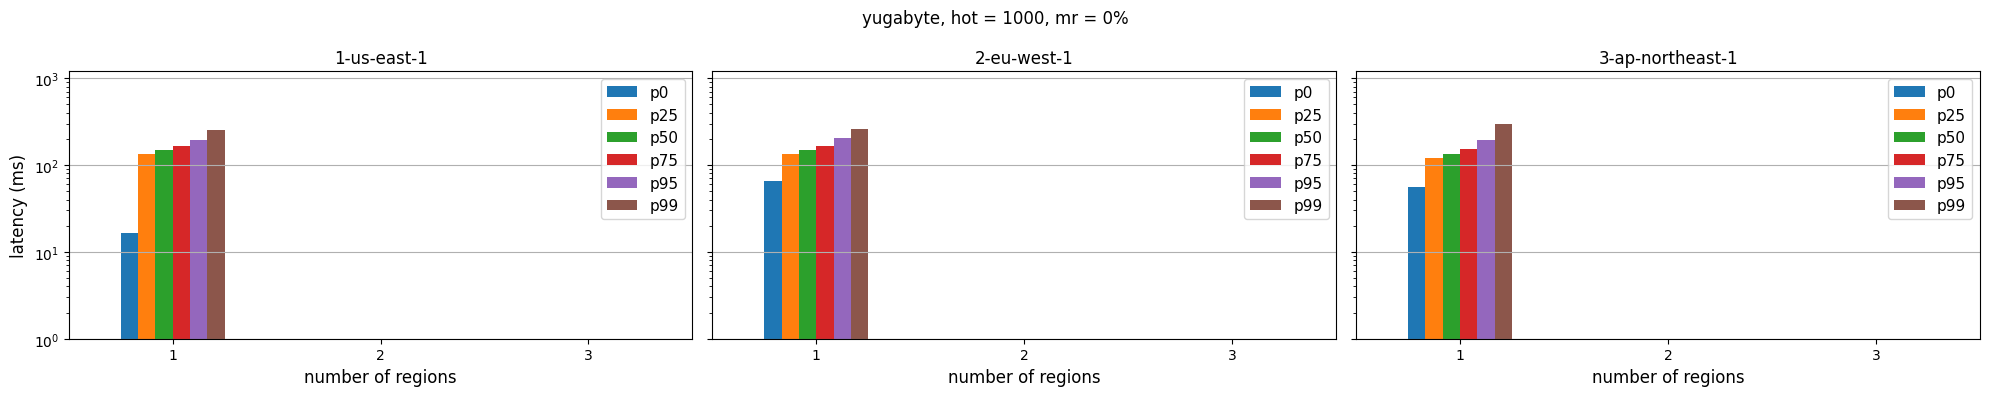

In [26]:
plot_latency(0, 1000)

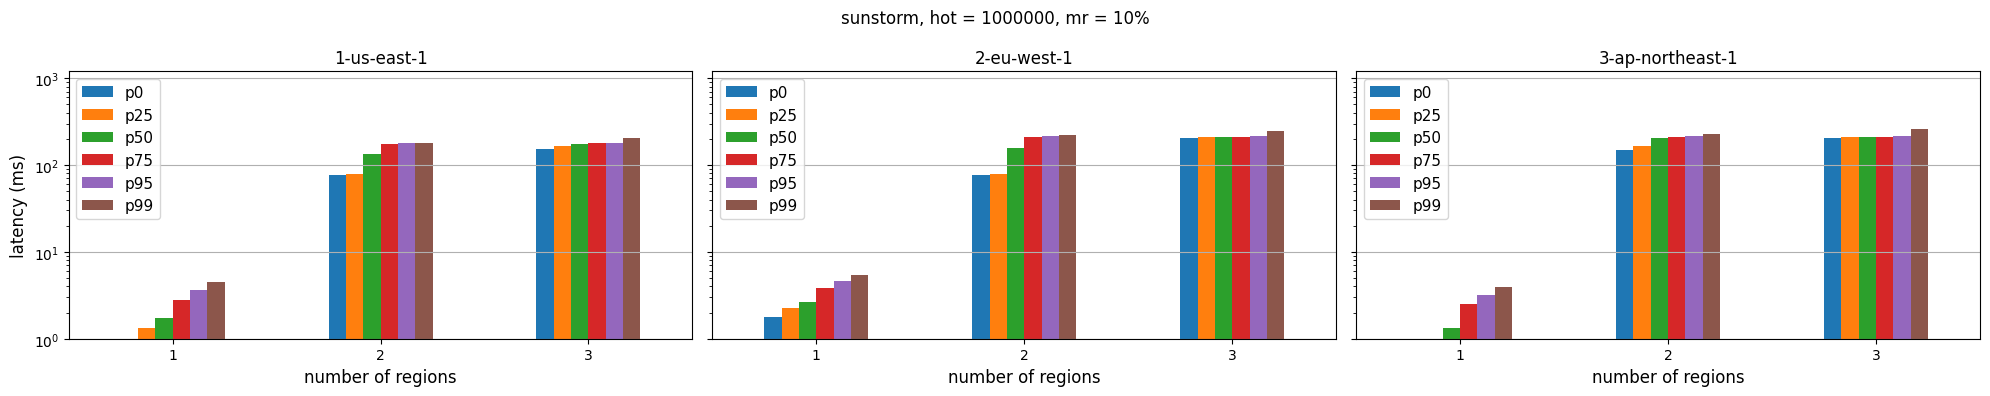

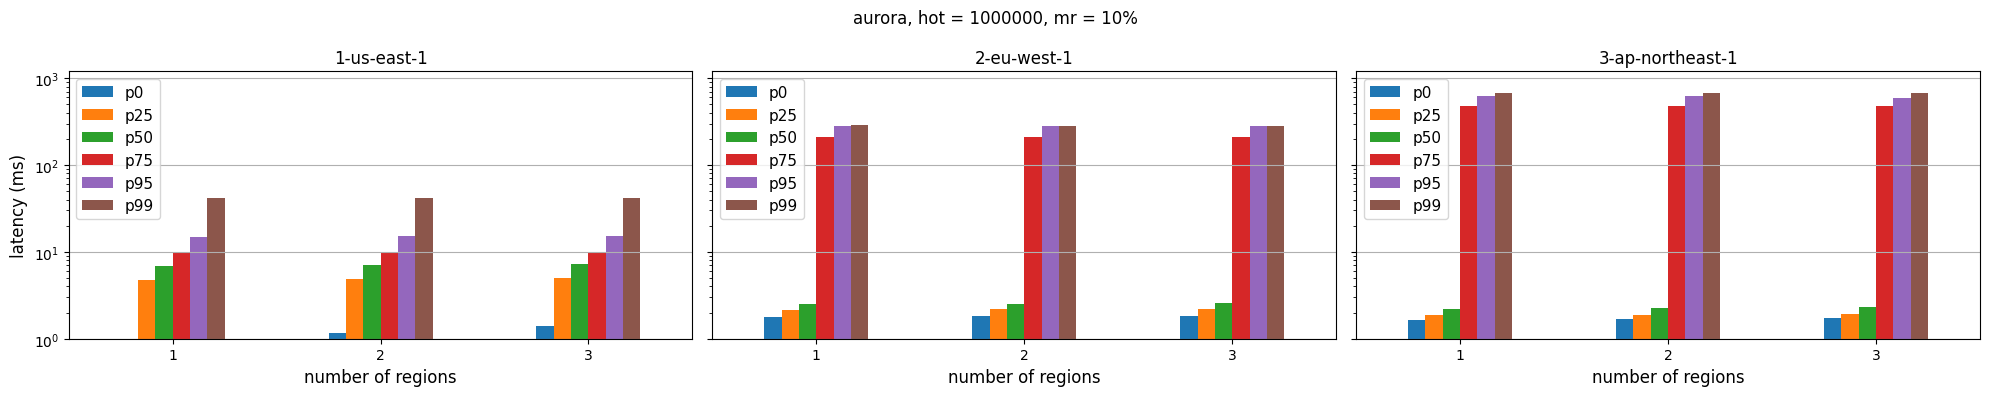

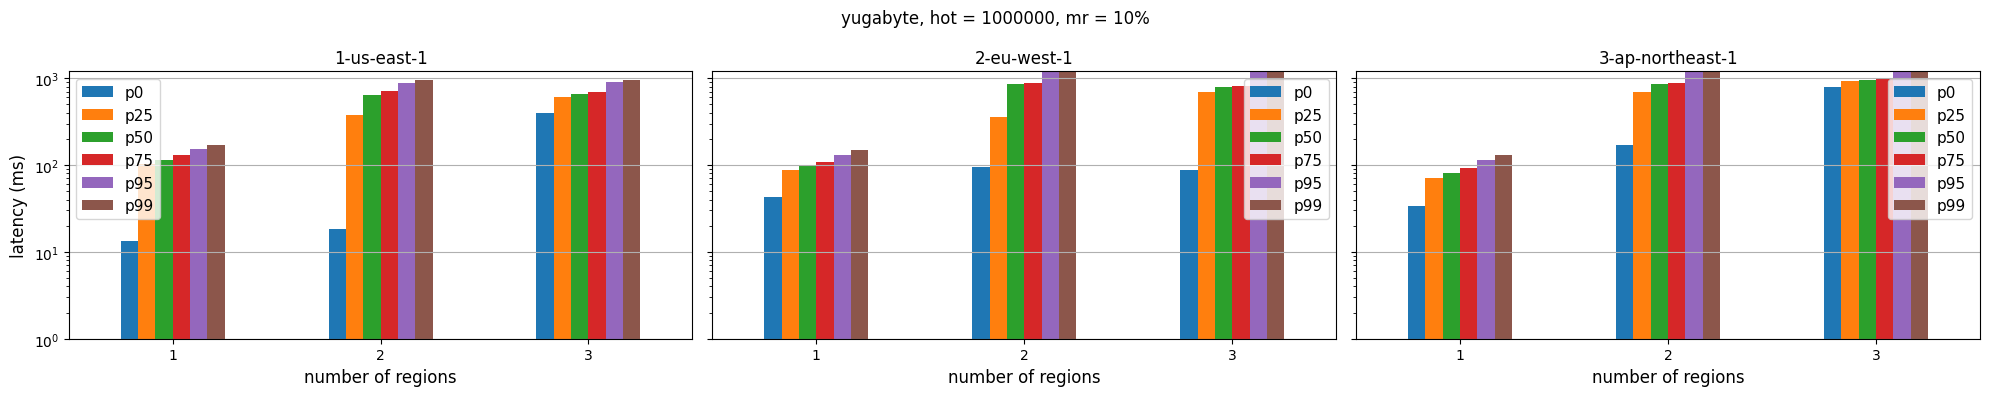

In [27]:
plot_latency(10, 1000000)

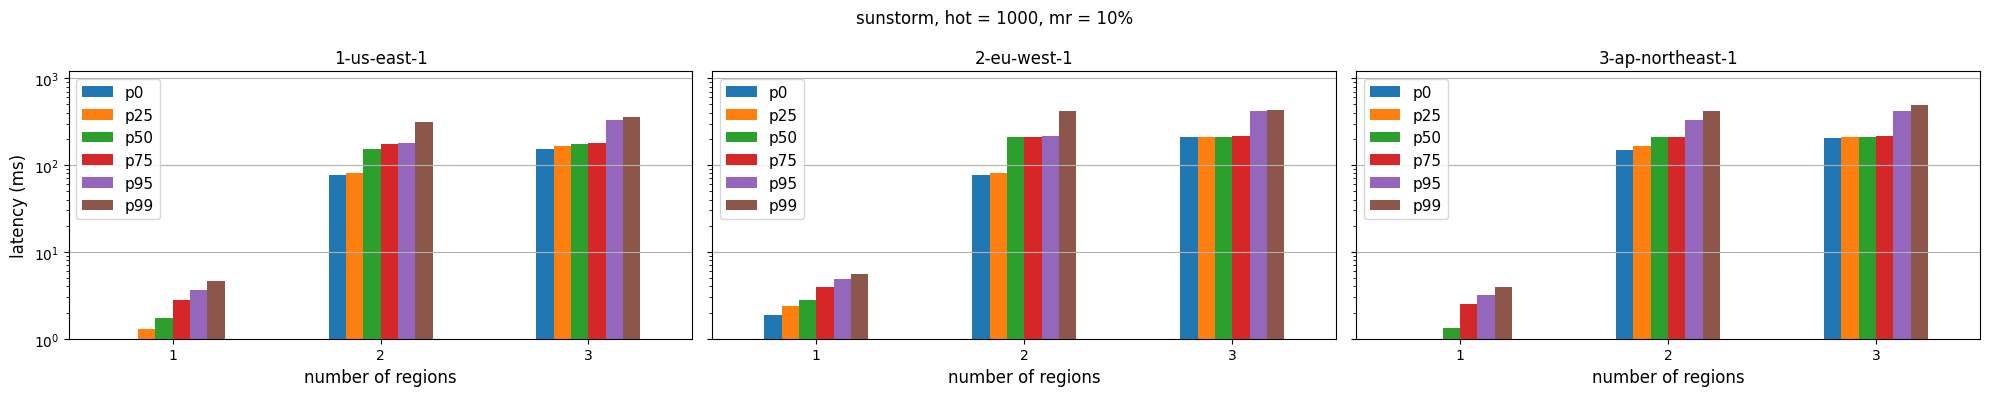

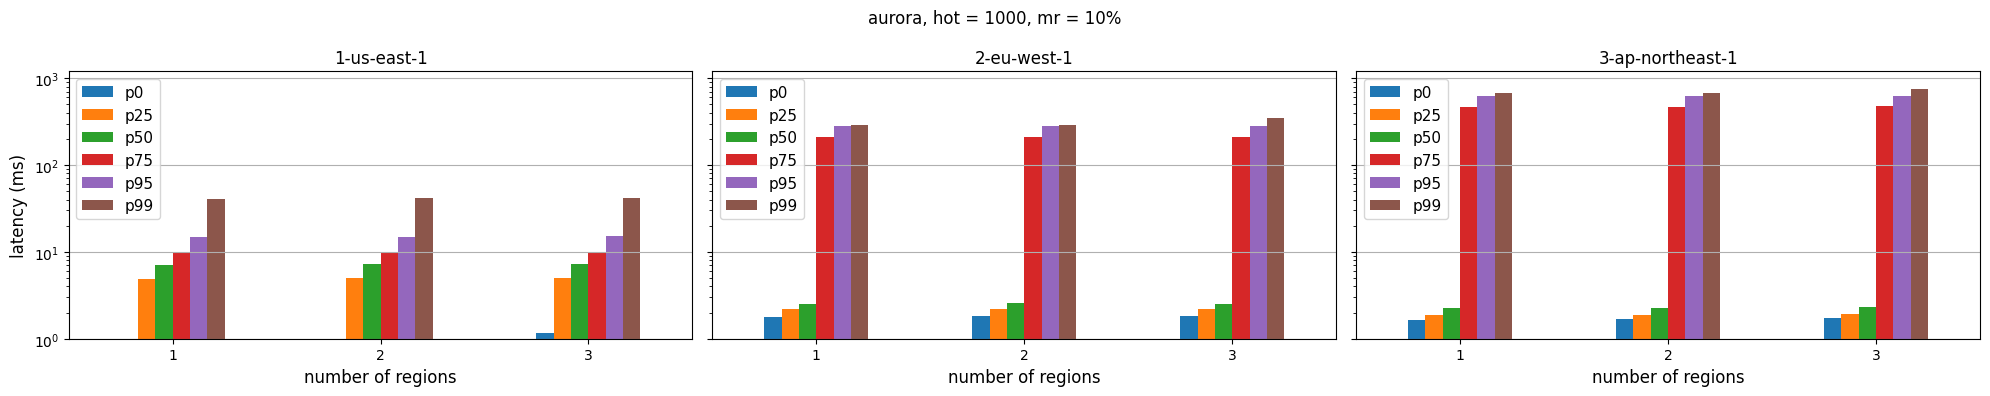

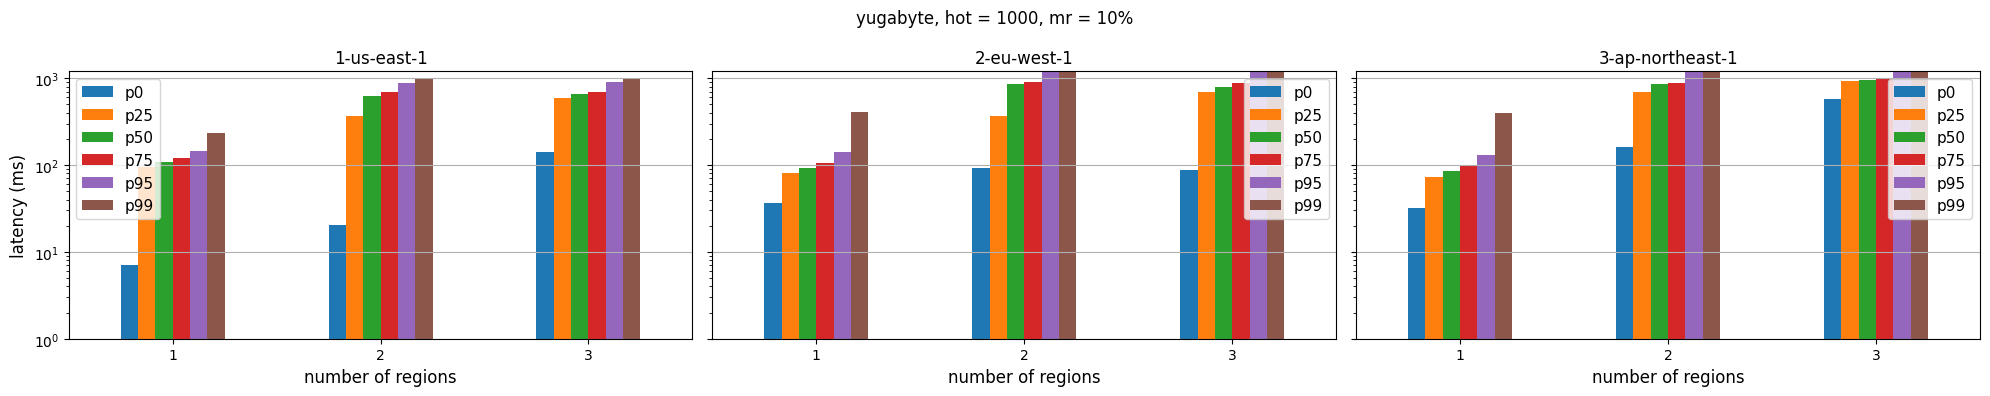

In [28]:
plot_latency(10, 1000)

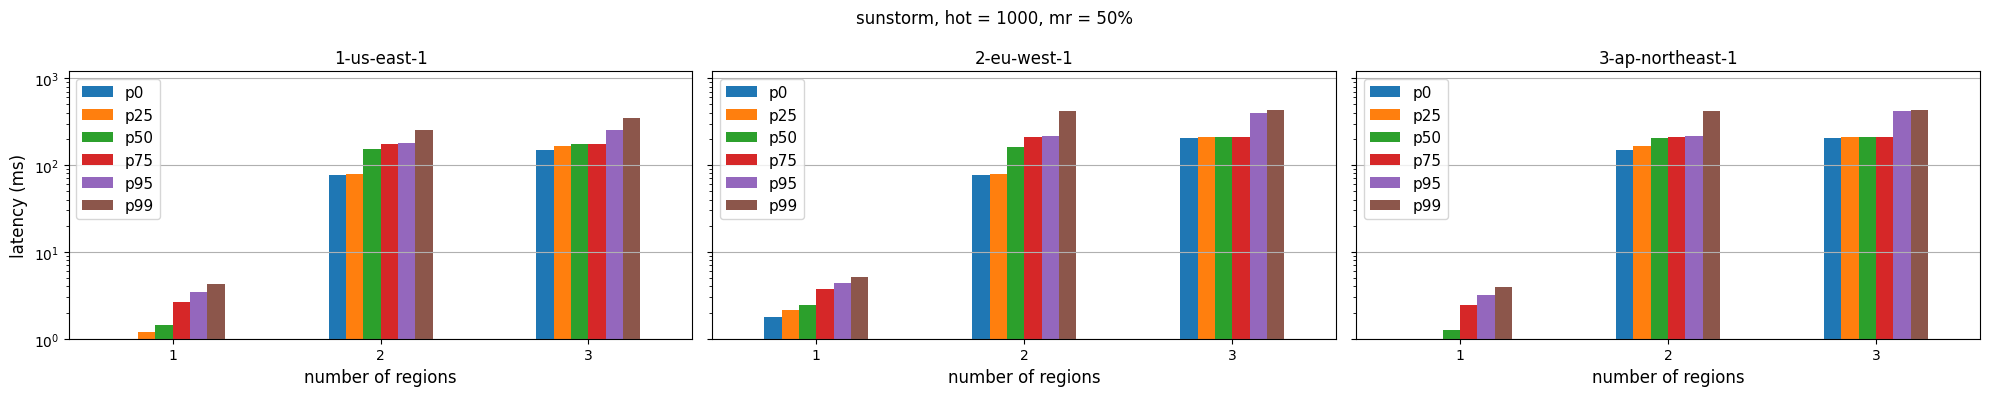

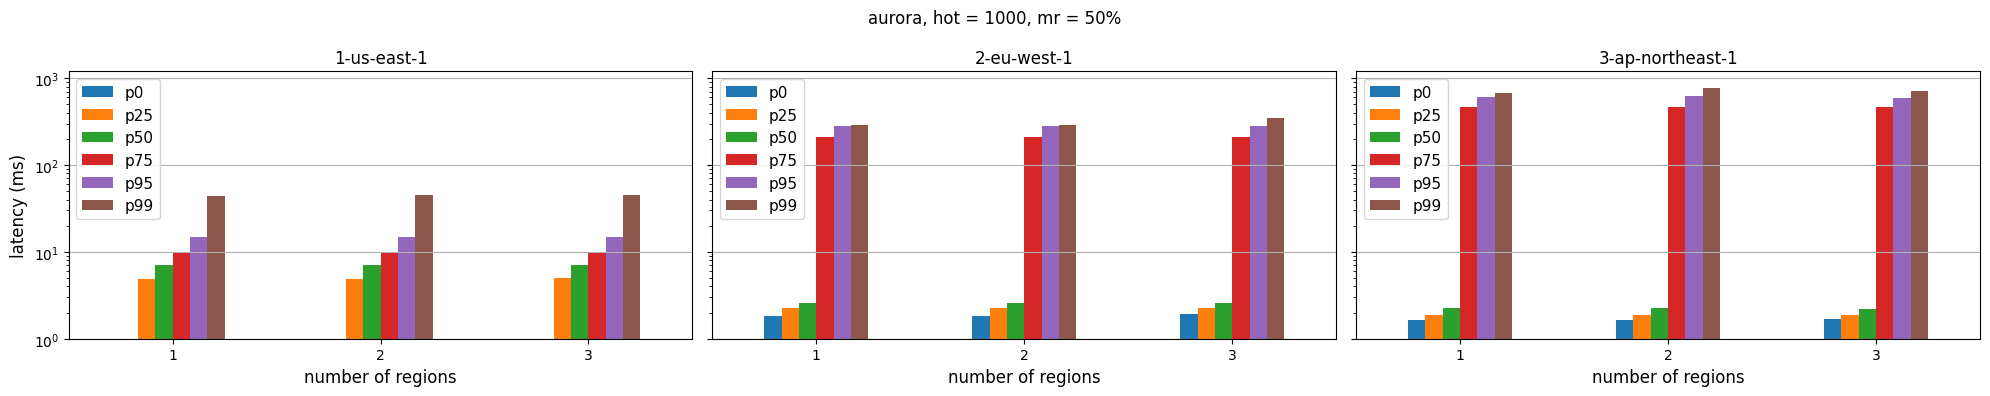

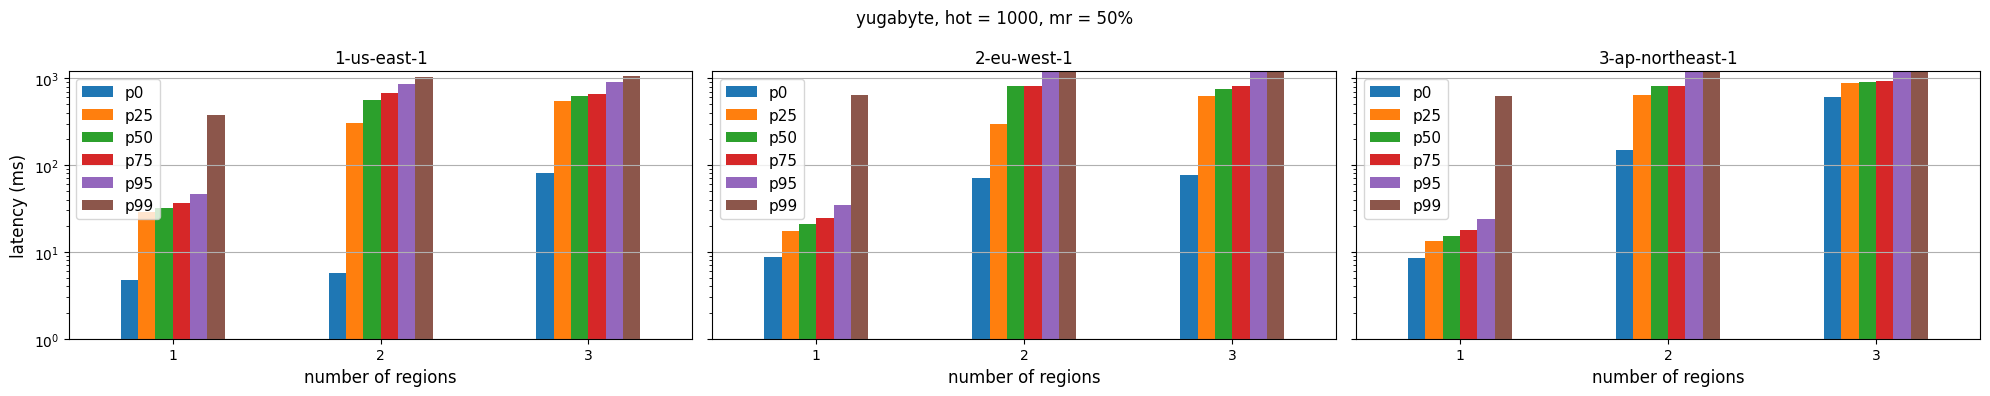

In [29]:
plot_latency(50, 1000)